In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
df.head()
# Select a feature to analy
feature = 'sepal length (cm)'
data = df[feature]

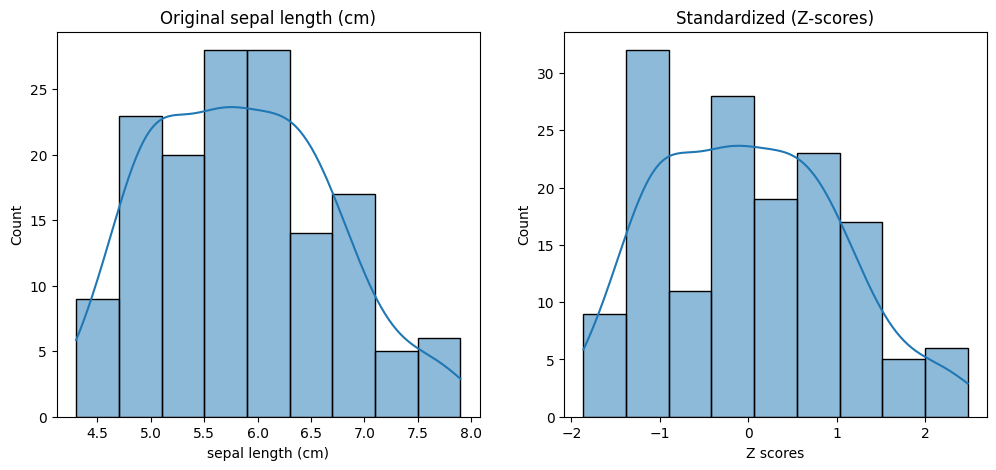

In [17]:
df['Z scores']= (data -data.mean())/data.std()
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(data, kde=True)
plt.title(f'Original {feature}')

plt.subplot(1, 2, 2)
sns.histplot(df['Z scores'], kde=True)
plt.title('Standardized (Z-scores)')
plt.show()

Shapiro-Wilk test: p-value = 0.0102
Not normal


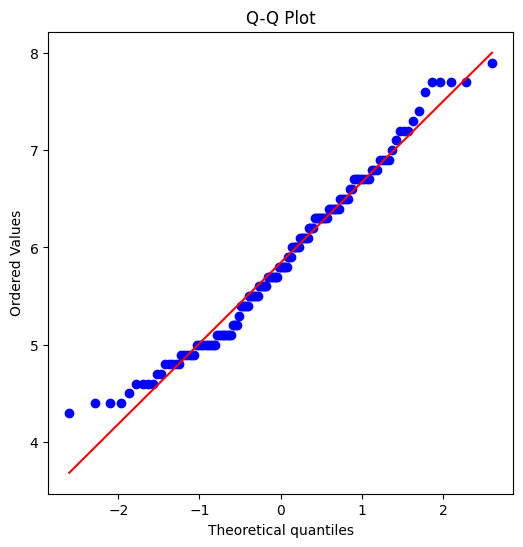

In [18]:
# Shapiro-Wilk test (formal normality test)
stat, p = stats.shapiro(data)
print(f'Shapiro-Wilk test: p-value = {p:.4f}')
print('Normal' if p > 0.05 else 'Not normal')

# Q-Q plot (visual normality check)
plt.figure(figsize=(6, 6))
stats.probplot(data, plot=plt)
plt.title('Q-Q Plot')
plt.show()

Skewness: 0.3118
Interpretation:
≈0: Normal | >0: Right-skewed | <0: Left-skewed


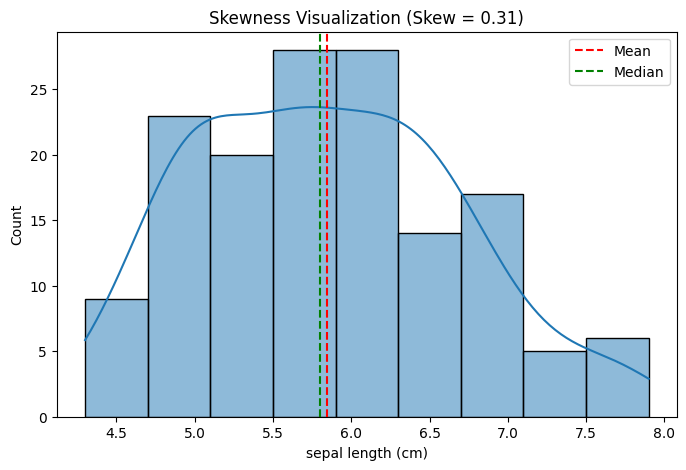

In [19]:
# Calculate skewness
skew = stats.skew(data)
print(f'Skewness: {skew:.4f}')
print('Interpretation:')
print('≈0: Normal | >0: Right-skewed | <0: Left-skewed')

# Visualize skewness
plt.figure(figsize=(8, 5))
sns.histplot(data, kde=True)
plt.axvline(data.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(data.median(), color='g', linestyle='--', label='Median')
plt.legend()
plt.title(f'Skewness Visualization (Skew = {skew:.2f})')
plt.show()

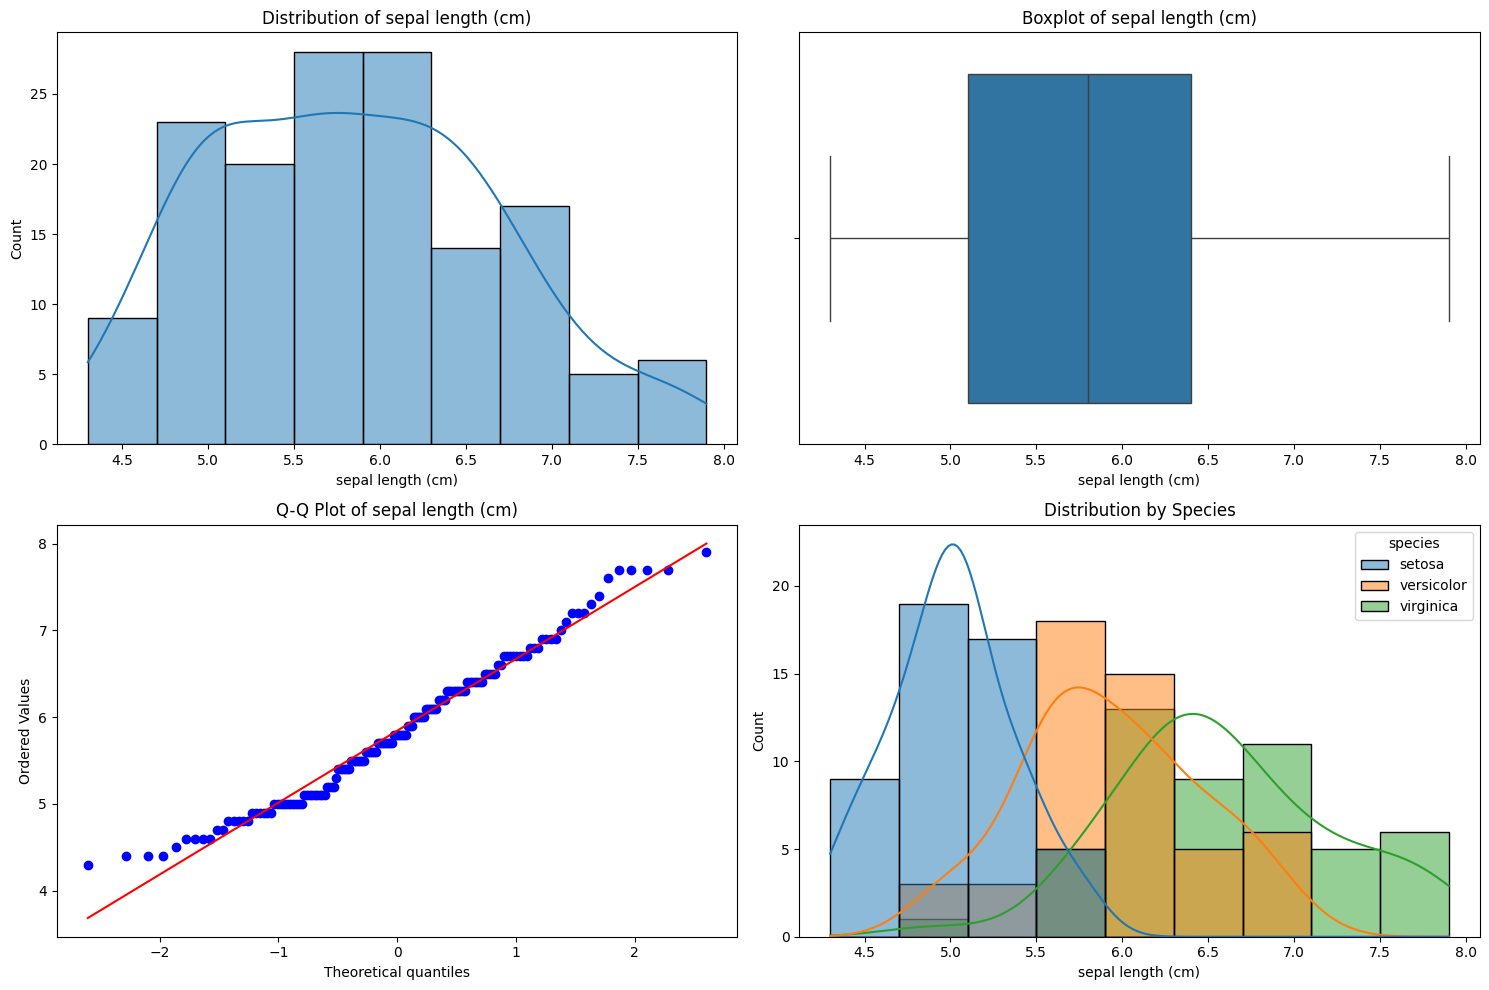


--- sepal length (cm) Analysis ---
Shapiro-Wilk p-value: 0.0102
Skewness: 0.3118
Kurtosis: -0.5736


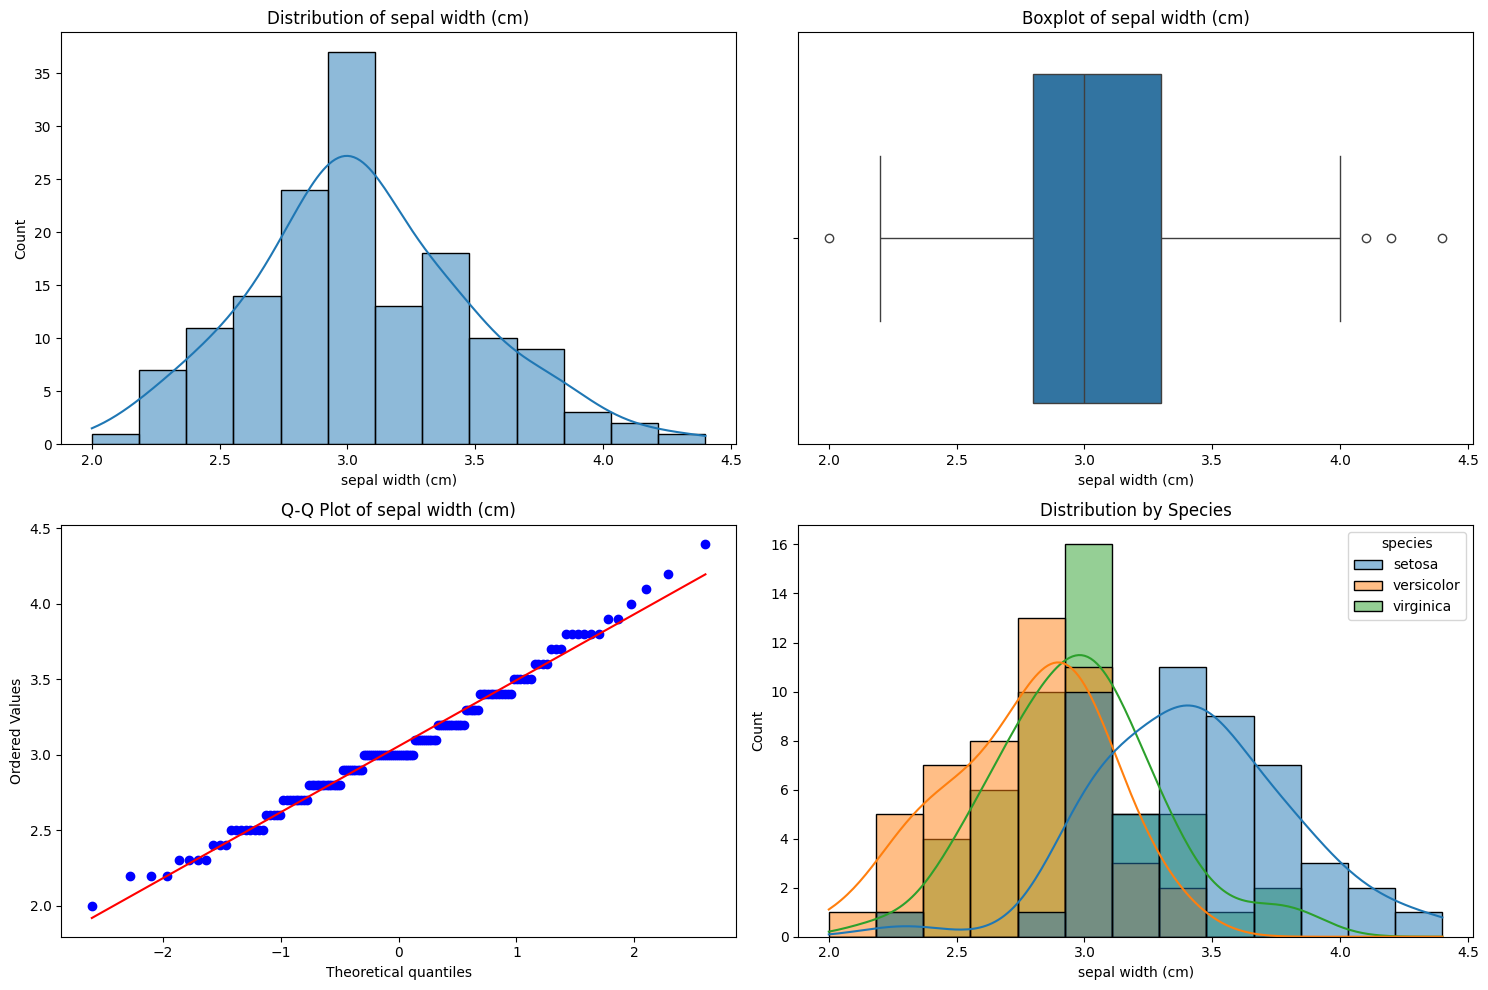


--- sepal width (cm) Analysis ---
Shapiro-Wilk p-value: 0.1012
Skewness: 0.3158
Kurtosis: 0.1810


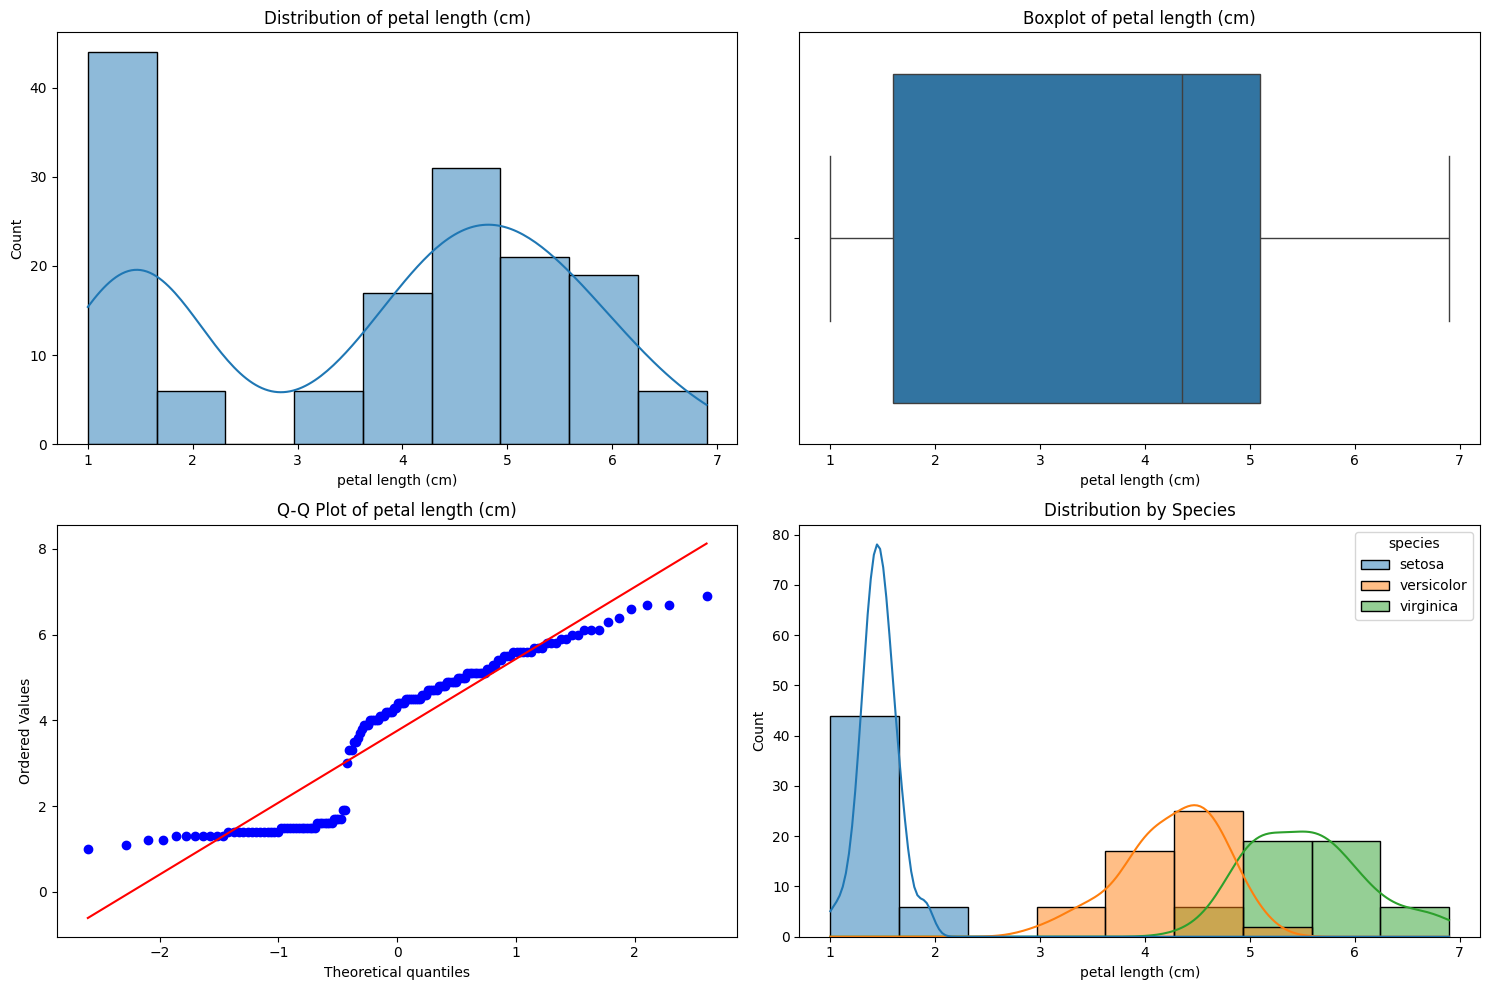


--- petal length (cm) Analysis ---
Shapiro-Wilk p-value: 0.0000
Skewness: -0.2721
Kurtosis: -1.3955


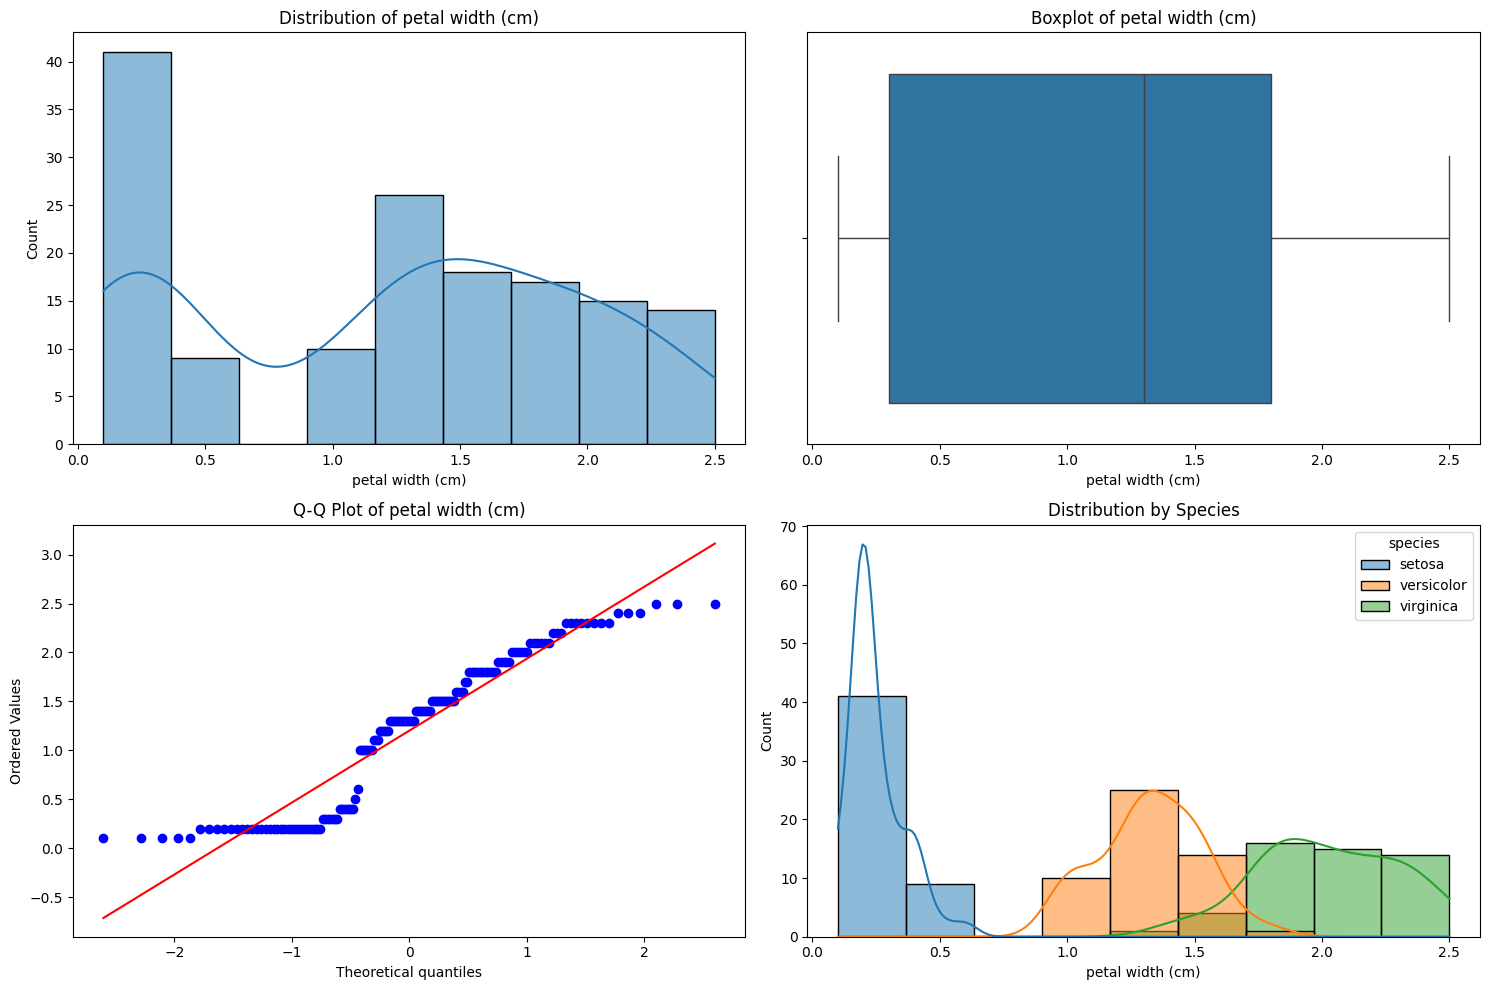


--- petal width (cm) Analysis ---
Shapiro-Wilk p-value: 0.0000
Skewness: -0.1019
Kurtosis: -1.3361


In [21]:
def analyze_distribution(feature):
    plt.figure(figsize=(15, 10))
    
    # Histogram with KDE
    plt.subplot(2, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    
    # Boxplot
    plt.subplot(2, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    
    # Q-Q Plot
    plt.subplot(2, 2, 3)
    stats.probplot(df[feature], plot=plt)
    plt.title(f'Q-Q Plot of {feature}')
    
    # By species
    plt.subplot(2, 2, 4)
    sns.histplot(data=df, x=feature, hue='species', kde=True)
    plt.title(f'Distribution by Species')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical tests
    print(f'\n--- {feature} Analysis ---')
    stat, p = stats.shapiro(df[feature])
    print(f'Shapiro-Wilk p-value: {p:.4f}')
    print(f'Skewness: {stats.skew(df[feature]):.4f}')
    print(f'Kurtosis: {stats.kurtosis(df[feature]):.4f}')

# Analyze all features
for col in iris.feature_names:
    analyze_distribution(col)